# July 18th, 2018
## Benjamin Adam Catching
## Andino Lab, Summer Rotation Project
## Poliovirus DIPs Project

The goal is that by the middle of the day the images from the second microfluidics test will be processed by the new microfluidics_analysis script and the results analyzed. The aspects to be summarized into two graphs will be  
1) A bargraph of the percentage of droplets containing a cell for each condition (HeLa, 293T, Fast, Slow, Rock) with a value N for each bar.  
2) A bargraph of the percentage of alive cells, again with a N for each condition.

In [1]:
# Import necessary packages for displaying the results
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import skimage
import glob
import pandas as pd
from tools import microfluidics_analysis as micro

%matplotlib inline

In [2]:
# Set the image directory based on if working on notebook in pycharm or not
in_pycharm = True
if in_pycharm:
    bulk_cell_dir = 'data/20180710_Microfluidic_picture/'
else:
    bulk_cell_dir = '../../data/20180710_Microfluidic_picture/'
    
# Define the six directories that contain image files
hs_files = 'HeLa_Slow/*40X*.tif'
hf_files = 'HeLa_Fast/*40X*.tif'
hsr_files = 'HeLa_Slow_Rock/*40X*.tif'
hfr_files = 'HeLa_Fast_Rock/*40X*.tif'
two93f_files = '293T_Fast/*40X*.tif'
two93fr_files = '293T_Fast_Rock/*40X*.tif'

In [3]:
# Read in the HeLa cell files and sort
hela_slow_files = sorted(glob.glob(bulk_cell_dir + hs_files))
hela_slow_rock_files = sorted(glob.glob(bulk_cell_dir + hsr_files))
hela_fast_files = sorted(glob.glob(bulk_cell_dir + hf_files))
hela_fast_rock_files = sorted(glob.glob(bulk_cell_dir + hfr_files))
two93_fast_files = sorted(glob.glob(bulk_cell_dir + two93f_files))
two93_fast_rock_files = sorted(glob.glob(bulk_cell_dir + two93fr_files))

In [4]:
# Combine all file directories
cell_files = [hela_slow_files,
              hela_slow_rock_files,
              hela_fast_files,
              hela_fast_rock_files,
              two93_fast_files,
              two93_fast_rock_files]

In [5]:
# Define the lists that will be turned into a DataFrame
cell, speed, rock, droplet_area, num_cells, num_dead = \
    [], [], [], [], [], []

In [6]:
# Read in the 293T files
for directory in cell_files:
    for i, bright_file in enumerate(directory[0::2]):
    
        # Define the cell type, speed, and rock or not
        if i <= 3:
            cell_type = 'HeLa'
        else:
            cell_type = '293T'
        if i <= 1:
            speed_type = 'Slow'
        else:
            speed_type = 'Fast'
        if i % 2 == 0:
            rock_type = False
        else:
            rock_type = True
    
        # Shift the index and define the bright and gfp images
        index = i * 2
        bright_file = bright_file
        gfp_file = directory[index+1]
    
        # Initialize the droplet object
        temp_droplet_image = micro.BulkDroplet(bright_file, multi_channel=True)
    
        # Define the regions of the droplets
        temp_droplet_labeled, temp_droplet_props = temp_droplet_image.droplet_segment(testing=False)
        
    
        # Define the cell attributes of the droplets
        droplet_cells_list, gfp_droplets = micro.cell_bright_gfp_thresh(temp_droplet_labeled, 
                                                              temp_droplet_props,
                                                              bright_file,
                                                              gfp_file)
        #print(micro.diff_cells(droplet_cells_list[0])[0].max())
    
        # Define the number of brightfield and gfp cells
        all_cells = [micro.diff_cells(x)[0].max() for x in droplet_cells_list]
        dead_cells = [micro.diff_cells(x)[0].max() for x in gfp_droplets]
    
        # Make sure that all the lists are the same length
        if len(temp_droplet_props) == len(all_cells) == len(dead_cells):
            for j, droplet in enumerate(temp_droplet_props):
                cell.append(cell_type)
                speed.append(speed_type)
                rock.append(rock_type)
                droplet_area.append(droplet.area)
                num_cells.append(all_cells[j])
                num_dead.append(dead_cells[j])
        else:
            print('Set %d has %d droplets, %d cell regions, and %d dead cell regions'
                  % (i, len(temp_droplet_props), len(all_cells), len(dead_cells)))

The file is updated


The file is updated


The file is updated


The file is updated


The file is updated


The file is updated


The file is updated


The file is updated


The file is updated


The file is updated


The file is updated


The file is updated


The file is updated


The file is updated


The file is updated


The file is updated


The file is updated


In [7]:
# Create the pandas dictionary
column_names = ['cell', 'speed', 'rock', 'droplet_area', 'num_cells', 'num_dead']
column_data = zip(column_names, [cell, 
                                 speed, 
                                 rock, 
                                 droplet_area, 
                                 num_cells, 
                                 num_dead])
dataframe_data = dict(column_data)
initial_cell_data = pd.DataFrame(dataframe_data)

In [8]:
# Convert the area in pixels to area in square microns
microns_per_pixel = 0.1605
initial_cell_data['droplet_area_micron'] = initial_cell_data['droplet_area'] * (microns_per_pixel**2)

In [9]:
# Create a percentage of alive cells column
initial_cell_data['percent_alive'] = (initial_cell_data['num_cells'] - 
                                      initial_cell_data['num_dead']) / initial_cell_data['num_cells']
initial_cell_data['percent_alive'] = initial_cell_data['percent_alive'].replace(np.nan, 0)
initial_cell_data['percent_alive'] = initial_cell_data['percent_alive'].replace(-np.inf, 0)
initial_cell_data['percent_alive'].unique()

array([ 1. ,  0. , -0.5,  0.5, -1. ])

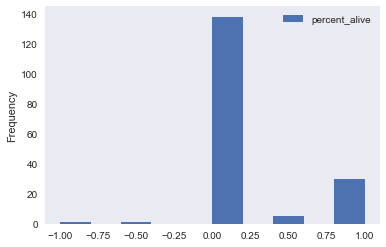

In [10]:
with sns.axes_style('dark'):
     initial_cell_data.plot(kind='hist', y='percent_alive')

In [11]:
# Group the cells by presence of Rock
rock_cells = initial_cell_data[initial_cell_data['rock']==True]
no_rock_cells = initial_cell_data[initial_cell_data['rock']==False]

# Group the cells by HeLa or 293T
hela_cells = initial_cell_data[initial_cell_data['cell']=='HeLa']
two93T_cells = initial_cell_data[initial_cell_data['cell']=='293T']

# Group the cells by either fast or slow
fast_cells = initial_cell_data[initial_cell_data['speed']=='Fast']
slow_cells = initial_cell_data[initial_cell_data['speed']=='Slow']

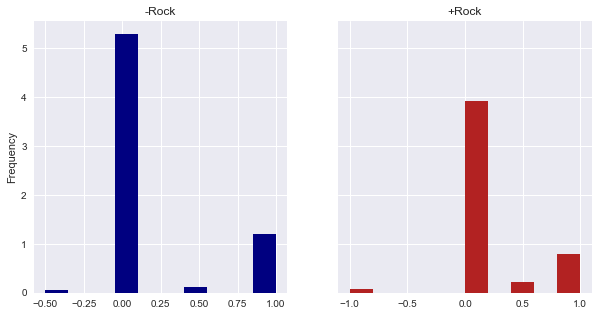

In [12]:
# If there is a noticable difference in the presence of rock
with sns.axes_style('darkgrid'):
    fig, ax = plt.subplots(1, 2, figsize=(10, 5), sharey=True)
    no_rock_cells.percent_alive.plot(kind='hist', ax=ax[0], density=1, color='navy')
    ax[0].set_title('-Rock')
    rock_cells.percent_alive.plot(kind='hist', ax=ax[1], density=1, color='firebrick')
    ax[1].set_title('+Rock')
plt.show()

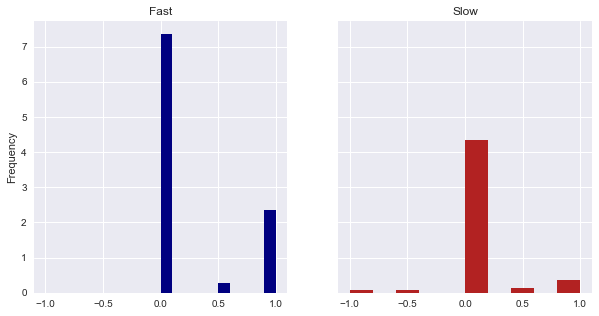

In [13]:
# Explore if there is a noticable difference in the speed
with sns.axes_style('darkgrid'):
    fig, ax = plt.subplots(1, 2, figsize=(10, 5), sharey=True, sharex=True)
    fast_cells.percent_alive.plot(kind='hist', ax=ax[0], density=1, color='navy')
    ax[0].set_title('Fast')
    slow_cells.percent_alive.plot(kind='hist', ax=ax[1], density=1, color='firebrick')
    ax[1].set_title('Slow')
plt.show()

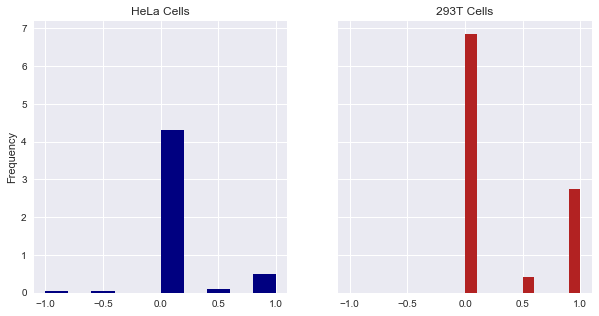

In [14]:
# See if there is difference in cell type
with sns.axes_style('darkgrid'):
    fig, ax = plt.subplots(1, 2, figsize=(10, 5), sharey=True, sharex=True)
    hela_cells.percent_alive.plot(kind='hist', ax=ax[0], density=1, color='navy')
    ax[0].set_title('HeLa Cells')
    two93T_cells.percent_alive.plot(kind='hist', ax=ax[1], density=1, color='firebrick')
    ax[1].set_title('293T Cells')
plt.show()

In [20]:
# Write the data to a .csv file
initial_cell_data.to_csv(bulk_cell_dir + 'Droplet_data.csv')

0
